In [1]:
import pandas as pd
import os
print("Current Working Directory", os.getcwd())

Current Working Directory /Users/amandafrick


In [2]:
os.chdir("/Users/amandafrick/Aunalytics_DS")

In [3]:
#read in the data
au_train = pd.read_csv('au_train_new.csv')
au_test = pd.read_csv('au_test_new.csv')

In [4]:
#Random Forest with the 9 attributes identified in the previous exercise.
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_jobs=2, random_state=0)
xtrain=au_train[['agegroup','workclass','educationnum','occupation','race','sex','investment','hoursperweek','maritalstatus']]
ytrain=au_train[['income']]

xtest=au_test[['agegroup','workclass','educationnum','occupation','race','sex','investment','hoursperweek','maritalstatus']]
ytest=au_test[['income']]

xtrain=pd.get_dummies(xtrain)
xtest=pd.get_dummies(xtest)

clf.fit(xtrain,ytrain.values.ravel())
y_pred=clf.predict(xtest)

print("Accuracy:", metrics.accuracy_score(ytest,y_pred))

Accuracy: 0.8277747067133469


In [5]:
#Accuracy of the RF model 82.78%
#Confusion Matrix
order = ['>50K','<=50K']
c = pd.crosstab(ytest.values.ravel(),y_pred,rownames=['Actual income'],colnames=['Predicted income'],margins=True)
c = c.reindex(order,columns=order)
c

Predicted income,>50K,<=50K
Actual income,,
>50K,2226,1620
<=50K,1184,11251


In [6]:
#From the results above we can see we have the following:
#TP = 2226, FP = 1620, FN = 1184 and TN = 11251

import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

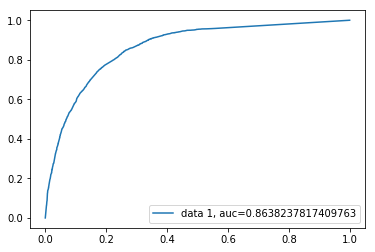

In [7]:
y_pred_proba = clf.predict_proba(xtest)[::,1]

ytest2 = ytest.eq('>50K').mul(1) 
ytest2 = ytest2.astype(int)

fpr, tpr, _ = metrics.roc_curve(ytest2.values.ravel(), y_pred_proba) 
auc = metrics.roc_auc_score(ytest2.values.ravel(), y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.show()

In [8]:
#Logistic regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(xtrain,ytrain.values.ravel())
y_pred_lr=logreg.predict(xtest)

print("Accuracy:",metrics.accuracy_score(ytest, y_pred_lr))

Accuracy: 0.8406731773232602


In [9]:
#Accuracy of the LR model 84.07%

#Confusion Matrix
cm_lr = pd.crosstab(ytest.values.ravel(),y_pred_lr,rownames=['Actual income'],colnames=['Predicted income'],margins=True)
cm_lr = cm_lr.reindex(order,columns=order)
cm_lr

Predicted income,>50K,<=50K
Actual income,,
>50K,2144,1702
<=50K,892,11543


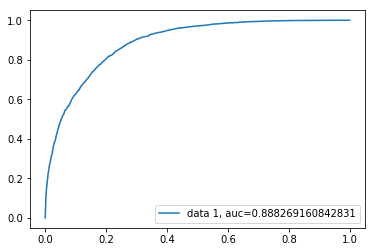

In [10]:
#From the results above we can see we have the following:
#TP = 2144, FP = 892, FN = 1702 and TN = 11543

y_pred_proba_lr = logreg.predict_proba(xtest)[::,1]

fpr, tpr, _ = metrics.roc_curve(ytest2.values.ravel(), y_pred_proba_lr) 
auc = metrics.roc_auc_score(ytest2.values.ravel(), y_pred_proba_lr)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.show()

In [11]:
#NN
from sklearn.neural_network import MLPClassifier

clf_NN = MLPClassifier(hidden_layer_sizes=5)
clf_NN.fit(xtrain,ytrain.values.ravel())
   
y_pred_NN = clf_NN.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, y_pred_NN))

Accuracy: 0.8379706406240403


In [12]:
#Accuracy of the NN model 83.80%

#Confusion Matrix
cm_nn = pd.crosstab(ytest.values.ravel(),y_pred_NN,rownames=['Actual income'],colnames=['Predicted income'],margins=True)
cm_nn = cm_nn.reindex(order,columns=order)
cm_nn

Predicted income,>50K,<=50K
Actual income,,
>50K,2367,1479
<=50K,1159,11276


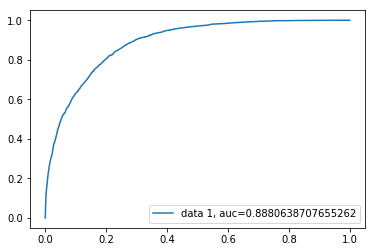

In [13]:
#From the results above we can see we have the following:
#TP = 2367, FP = 1159, FN = 1479 and TN = 11276

y_pred_proba_NN = clf_NN.predict_proba(xtest)[::,1]

fpr, tpr, _ = metrics.roc_curve(ytest2.values.ravel(), y_pred_proba_NN) 
auc = metrics.roc_auc_score(ytest2.values.ravel(), y_pred_proba_NN)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.show()

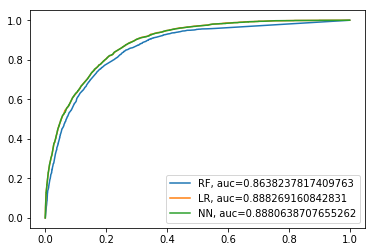

In [14]:
#Now let's compare the ROC for all 3 of the models

plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(ytest2.values.ravel(), y_pred_proba) 
auc = metrics.roc_auc_score(ytest2.values.ravel(), y_pred_proba)
plt.plot(fpr,tpr,label="RF, auc="+str(auc))

fpr, tpr, _ = metrics.roc_curve(ytest2.values.ravel(), y_pred_proba_lr) 
auc = metrics.roc_auc_score(ytest2.values.ravel(), y_pred_proba_lr)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))

fpr, tpr, _ = metrics.roc_curve(ytest2.values.ravel(), y_pred_proba_NN) 
auc = metrics.roc_auc_score(ytest2.values.ravel(), y_pred_proba_NN)
plt.plot(fpr,tpr,label="NN, auc="+str(auc))

plt.legend(loc=0)

In [ ]:
#Based on the Area Under ROC Curve the order of the models would be 
#LR = .888269, NN = .888064, RF = .863823
